#### Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nasdaqdatalink
import yfinance as yf

##### Nasdaq API Key

In [4]:
nasdaq_key = 'yUkkodwj1uqL1EPc1kdS'
nasdaqdatalink.ApiConfig.api_key = nasdaq_key

##### Período analisado

In [5]:
start_date = '2013-01-31'
end_date = '2023-10-31'

##### Criação dos DataFrames dos Indicadores Macroeconômicos

In [6]:
selic = pd.DataFrame()
confianca = pd.DataFrame()
pib = pd.DataFrame()
incc = pd.DataFrame()
ipca = pd.DataFrame()
dolar = pd.DataFrame()

##### Obtenção dos dados e inclusão nos DataFrames

In [7]:
selic['SELIC'] = nasdaqdatalink.get('BCB/432', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='daily')
confianca['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', 
                                            start_date=start_date, 
                                            end_date=end_date, 
                                            collapse='daily')
pib['PIB'] = nasdaqdatalink.get('BCB/4380', 
                                start_date=start_date, 
                                end_date=end_date, 
                                collapse='daily')
incc['INCC'] = nasdaqdatalink.get('BCB/192', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='daily')
ipca['IPCA'] = nasdaqdatalink.get('BCB/13522', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='daily')
dolar['DOLAR'] = nasdaqdatalink.get('BCB/10813', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='daily')

In [8]:
macros = pd.concat([selic, confianca, pib, incc, ipca, dolar], 
                   axis=1)
macros

,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
Date,,,,,,
2013-01-31,7.25,160.55,408889.7,0.65,6.15,1.9877
2013-02-01,7.25,NaN,NaN,NaN,NaN,1.9838
2013-02-02,7.25,NaN,NaN,NaN,NaN,NaN
2013-02-03,7.25,NaN,NaN,NaN,NaN,NaN
2013-02-04,7.25,NaN,NaN,NaN,NaN,1.9888
...,...,...,...,...,...,...
2023-09-21,12.75,NaN,NaN,NaN,NaN,4.9223
2023-09-22,12.75,NaN,NaN,NaN,NaN,4.9125
2023-09-23,12.75,NaN,NaN,NaN,NaN,NaN


In [9]:
macros.fillna(method='ffill', inplace=True)

##### Criando lista de FIIs

In [10]:
lista_fiis = ['HGLG11.SA', 'MXRF11.SA', 'KNCR11.SA', 'BRCR11.SA', 'BCFF11.SA']
fiis = yf.download(lista_fiis, start=start_date, end=end_date)['Adj Close']
fiis

[*********************100%***********************]  5 of 5 completed


,BCFF11.SA,BRCR11.SA,HGLG11.SA,KNCR11.SA,MXRF11.SA
Date,,,,,
2013-01-31,87.284935,NaN,110.435394,NaN,NaN
2013-02-01,88.052483,NaN,110.461090,NaN,NaN
2013-02-04,87.969177,NaN,110.032951,NaN,NaN
2013-02-05,86.868423,NaN,110.032951,NaN,NaN
2013-02-06,80.621078,NaN,110.889252,NaN,NaN
...,...,...,...,...,...
2023-09-20,73.220001,62.799999,161.000000,99.620003,10.98
2023-09-21,74.720001,62.900002,161.779999,99.449997,10.95
2023-09-22,74.540001,62.430000,161.000000,99.000000,10.95


In [11]:
fiis.fillna(method='ffill', inplace=True)

##### Criando DataFrame com os indicadores e os FIIs

In [12]:
comparativo_fiis = pd.merge(fiis, macros, how='inner', left_index=True, right_index=True)
comparativo_fiis

,BCFF11.SA,BRCR11.SA,HGLG11.SA,KNCR11.SA,MXRF11.SA,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
Date,,,,,,,,,,,
2013-01-31,87.284935,NaN,110.435394,NaN,NaN,7.25,160.55,408889.7,0.65,6.15,1.9877
2013-02-01,88.052483,NaN,110.461090,NaN,NaN,7.25,160.55,408889.7,0.65,6.15,1.9838
2013-02-04,87.969177,NaN,110.032951,NaN,NaN,7.25,160.55,408889.7,0.65,6.15,1.9888
2013-02-05,86.868423,NaN,110.032951,NaN,NaN,7.25,160.55,408889.7,0.65,6.15,1.9875
2013-02-06,80.621078,NaN,110.889252,NaN,NaN,7.25,160.55,408889.7,0.65,6.15,1.9878
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,74.000000,63.070000,161.600006,99.360001,10.90,13.25,131.02,902863.8,0.17,4.61,4.8569
2023-09-20,73.220001,62.799999,161.000000,99.620003,10.98,13.25,131.02,902863.8,0.17,4.61,4.8481
2023-09-21,74.720001,62.900002,161.779999,99.449997,10.95,12.75,131.02,902863.8,0.17,4.61,4.9223


##### Criando a correlação e heatmap

In [13]:
corr_fiis = comparativo_fiis.corr()
corr_fiis

,BCFF11.SA,BRCR11.SA,HGLG11.SA,KNCR11.SA,MXRF11.SA,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
BCFF11.SA,1.000000,-0.009686,0.703403,-0.412521,0.737198,-0.789788,0.191176,0.324219,0.036123,-0.588649,0.447628
BRCR11.SA,-0.009686,1.000000,-0.552581,-0.045418,-0.390404,-0.167321,-0.193383,-0.840871,-0.185443,-0.293475,-0.735920
HGLG11.SA,0.703403,-0.552581,1.000000,-0.302526,0.847568,-0.442935,0.144743,0.824125,0.100119,-0.250040,0.808477
KNCR11.SA,-0.412521,-0.045418,-0.302526,1.000000,0.001605,0.778532,0.034463,0.016321,-0.391068,0.159769,-0.409196
MXRF11.SA,0.737198,-0.390404,0.847568,0.001605,1.000000,-0.391175,0.615846,0.677390,-0.031740,-0.486425,0.564209
SELIC,-0.789788,-0.167321,-0.442935,0.778532,-0.391175,1.000000,-0.228460,-0.013306,-0.152714,0.558530,-0.276573
CONFIANCA,0.191176,-0.193383,0.144743,0.034463,0.615846,-0.228460,1.000000,-0.065170,-0.080252,-0.287384,-0.280696
PIB,0.324219,-0.840871,0.824125,0.016321,0.677390,-0.013306,-0.065170,1.000000,0.085389,0.068009,0.840580
INCC,0.036123,-0.185443,0.100119,-0.391068,-0.031740,-0.152714,-0.080252,0.085389,1.000000,0.277777,0.150058
IPCA,-0.588649,-0.293475,-0.250040,0.159769,-0.486425,0.558530,-0.287384,0.068009,0.277777,1.000000,0.057227


<Axes: >

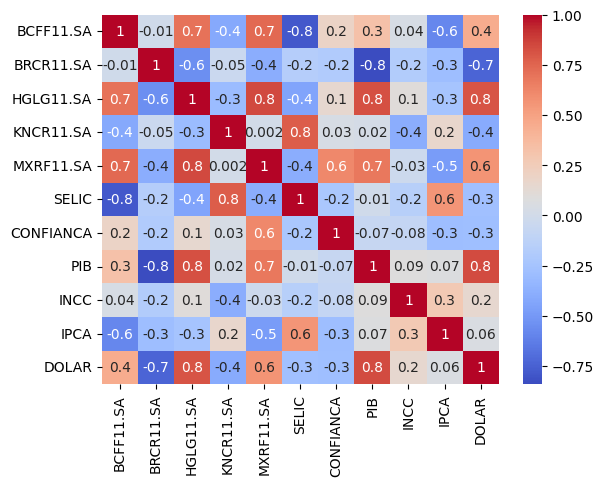

In [14]:
tabela_fiis = corr_fiis.columns

sns.heatmap(corr_fiis, cmap='coolwarm',
            annot=True, fmt='.1g',
            xticklabels=tabela_fiis,
            yticklabels=tabela_fiis)

##### Plotando gráficos

In [15]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['HGLG11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='PIB', x=comparativo_fiis.index, 
                         y=comparativo_fiis['PIB']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'HGLG11 vs PIB', 
                  template='simple_white')
fig.show()

In [16]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='BRCR11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['BRCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='PIB', x=comparativo_fiis.index, 
                         y=comparativo_fiis['PIB']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'BRCR11 vs PIB', 
                  template='simple_white')
fig.show()

In [17]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='KNCR11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['KNCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=comparativo_fiis.index, 
                         y=comparativo_fiis['SELIC']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'KNCR11 vs SELIC', 
                  template='simple_white')
fig.show()

In [18]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='MXRF11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['MXRF11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['HGLG11.SA']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'MXRF11 vs HGLG11', 
                  template='simple_white')
fig.show()

In [19]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='MXRF11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['MXRF11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='BCFF11.SA', x=comparativo_fiis.index, 
                         y=comparativo_fiis['BCFF11.SA']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'MXRF11 vs BCFF11', 
                  template='simple_white')
fig.show()